In [62]:
import matplotlib
print(matplotlib.__path__)

['C:\\Users\\HASEE\\Anaconda3\\lib\\site-packages\\matplotlib']


In [63]:
%config IPCompleter.greedy=True

In [64]:
C:\Users\HASEE

SyntaxError: unexpected character after line continuation character (<ipython-input-64-b0559fbedb51>, line 1)

In [65]:
cd

C:\Users\HASEE


In [66]:
cd Anaconda3

C:\Users\HASEE\Anaconda3


In [67]:
cd lib

C:\Users\HASEE\Anaconda3\lib


In [68]:
cd site-packages

C:\Users\HASEE\Anaconda3\lib\site-packages


In [69]:
cd matplotlib

C:\Users\HASEE\Anaconda3\lib\site-packages\matplotlib


In [70]:
cd mpl-data

C:\Users\HASEE\Anaconda3\lib\site-packages\matplotlib\mpl-data


In [71]:
cd fonts 

C:\Users\HASEE\Anaconda3\lib\site-packages\matplotlib\mpl-data\fonts


In [72]:
cd ttf 

C:\Users\HASEE\Anaconda3\lib\site-packages\matplotlib\mpl-data\fonts\ttf


In [73]:
coordination_source = """
{name:'兰州', geoCoord:[103.73, 36.03]},
{name:'嘉峪关', geoCoord:[98.17, 39.47]},
{name:'西宁', geoCoord:[101.74, 36.56]},
{name:'成都', geoCoord:[104.06, 30.67]},
{name:'石家庄', geoCoord:[114.48, 38.03]},
{name:'拉萨', geoCoord:[102.73, 25.04]},
{name:'贵阳', geoCoord:[106.71, 26.57]},
{name:'武汉', geoCoord:[114.31, 30.52]},
{name:'郑州', geoCoord:[113.65, 34.76]},
{name:'济南', geoCoord:[117, 36.65]},
{name:'南京', geoCoord:[118.78, 32.04]},
{name:'合肥', geoCoord:[117.27, 31.86]},
{name:'杭州', geoCoord:[120.19, 30.26]},
{name:'南昌', geoCoord:[115.89, 28.68]},
{name:'福州', geoCoord:[119.3, 26.08]},
{name:'广州', geoCoord:[113.23, 23.16]},
{name:'长沙', geoCoord:[113, 28.21]},
//{name:'海口', geoCoord:[110.35, 20.02]},
{name:'沈阳', geoCoord:[123.38, 41.8]},
{name:'长春', geoCoord:[125.35, 43.88]},
{name:'哈尔滨', geoCoord:[126.63, 45.75]},
{name:'太原', geoCoord:[112.53, 37.87]},
{name:'西安', geoCoord:[108.95, 34.27]},
//{name:'台湾', geoCoord:[121.30, 25.03]},
{name:'北京', geoCoord:[116.46, 39.92]},
{name:'上海', geoCoord:[121.48, 31.22]},
{name:'重庆', geoCoord:[106.54, 29.59]},
{name:'天津', geoCoord:[117.2, 39.13]},
{name:'呼和浩特', geoCoord:[111.65, 40.82]},
{name:'南宁', geoCoord:[108.33, 22.84]},
//{name:'西藏', geoCoord:[91.11, 29.97]},
{name:'银川', geoCoord:[106.27, 38.47]},
{name:'乌鲁木齐', geoCoord:[87.68, 43.77]},
{name:'香港', geoCoord:[114.17, 22.28]},
{name:'澳门', geoCoord:[113.54, 22.19]}
"""

In [74]:
import networkx as nx 

In [75]:
import re 

In [76]:
x="name:'澳门', geoCoord:[113.54, 22.19]"

In [77]:
y = re.findall("name:'(\w+)'",x)

In [78]:
y

['澳门']

In [79]:
city_location = {}

In [80]:
for line in coordination_source.split('\n'):
    
    if line.startswith('//'): continue
    if line.strip() == '':continue
    city = re.findall("name:'(\w+)'",line)[0]
    x_y = re.findall("Coord:\[(\d+.\d+),\s(\d+.\d+)\]",line)[0]
    
    x_y = tuple(map(float,x_y))
    city_location[city] = x_y


    
                      

In [81]:
city_location

{'兰州': (103.73, 36.03),
 '嘉峪关': (98.17, 39.47),
 '西宁': (101.74, 36.56),
 '成都': (104.06, 30.67),
 '石家庄': (114.48, 38.03),
 '拉萨': (102.73, 25.04),
 '贵阳': (106.71, 26.57),
 '武汉': (114.31, 30.52),
 '郑州': (113.65, 34.76),
 '济南': (117.0, 36.65),
 '南京': (118.78, 32.04),
 '合肥': (117.27, 31.86),
 '杭州': (120.19, 30.26),
 '南昌': (115.89, 28.68),
 '福州': (119.3, 26.08),
 '广州': (113.23, 23.16),
 '长沙': (113.0, 28.21),
 '沈阳': (123.38, 41.8),
 '长春': (125.35, 43.88),
 '哈尔滨': (126.63, 45.75),
 '太原': (112.53, 37.87),
 '西安': (108.95, 34.27),
 '北京': (116.46, 39.92),
 '上海': (121.48, 31.22),
 '重庆': (106.54, 29.59),
 '天津': (117.2, 39.13),
 '呼和浩特': (111.65, 40.82),
 '南宁': (108.33, 22.84),
 '银川': (106.27, 38.47),
 '乌鲁木齐': (87.68, 43.77),
 '香港': (114.17, 22.28),
 '澳门': (113.54, 22.19)}

In [82]:
import math 

In [83]:
def geo_distance(origin, destination):
    """
    Calculate the Haversine distance.

    Parameters
    ----------
    origin : tuple of float
        (lat, long)
    destination : tuple of float
        (lat, long)

    Returns
    -------
    distance_in_km : float

    Examples
    --------
    >>> origin = (48.1372, 11.5756)  # Munich
    >>> destination = (52.5186, 13.4083)  # Berlin
    >>> round(distance(origin, destination), 1)
    504.2
    """
    lat1, lon1 = origin
    lat2, lon2 = destination
    radius = 6371  # km

    dlat = math.radians(lat2 - lat1)
    dlon = math.radians(lon2 - lon1)
    a = (math.sin(dlat / 2) * math.sin(dlat / 2) +
         math.cos(math.radians(lat1)) * math.cos(math.radians(lat2)) *
         math.sin(dlon / 2) * math.sin(dlon / 2))
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    d = radius * c

    return d

In [84]:
def get_city_distance(city1,city2):
    
    return geo_distance(city_location[city1],city_location[city2])


In [85]:
get_city_distance('西安','广州')


649.323656161869

In [86]:
import networkx as nx

In [87]:
cities = list(city_location.keys())

In [88]:
city_graph = nx.Graph()

In [89]:
city_graph.add_nodes_from(cities)

In [90]:
%matplotlib inline

In [91]:
import matplotlib as plt

In [92]:
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

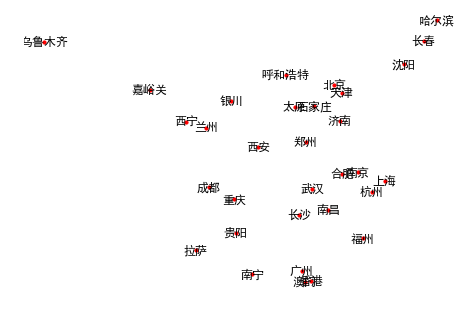

In [93]:
nx.draw(city_graph, city_location, with_labels=True, node_size=10)

In [94]:
from collections import defaultdict  


In [95]:
cities_connection  = defaultdict(list)

In [96]:
for c1 in cities:
    for c2 in cities:
        if c1== c2: continue
        
    
        if get_city_distance(c1,c2) < 700:
            cities_connection[c1].append(c2)
    

In [97]:
cities_connection

defaultdict(list,
            {'兰州': ['嘉峪关', '西宁', '成都', '拉萨', '贵阳', '西安', '重庆', '南宁', '银川'],
             '嘉峪关': ['兰州', '西宁', '成都', '拉萨'],
             '西宁': ['兰州', '嘉峪关', '成都', '拉萨', '贵阳', '重庆', '银川'],
             '成都': ['兰州', '嘉峪关', '西宁', '拉萨', '贵阳', '西安', '重庆', '南宁', '银川'],
             '石家庄': ['武汉',
              '郑州',
              '济南',
              '南京',
              '合肥',
              '南昌',
              '广州',
              '长沙',
              '太原',
              '西安',
              '北京',
              '天津',
              '呼和浩特'],
             '拉萨': ['兰州', '嘉峪关', '西宁', '成都', '贵阳', '重庆', '南宁', '银川'],
             '贵阳': ['兰州', '西宁', '成都', '拉萨', '西安', '重庆', '南宁', '银川'],
             '武汉': ['石家庄',
              '郑州',
              '济南',
              '南京',
              '合肥',
              '杭州',
              '南昌',
              '福州',
              '广州',
              '长沙',
              '太原',
              '西安',
              '北京',
              '天津',
              '呼和浩特',
  

In [98]:

cities_connection_graph = nx.Graph(cities_connection)

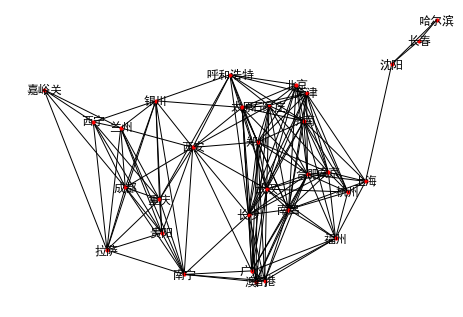

In [99]:
nx.draw(cities_connection_graph,city_location,with_labels = True,node_size = 10)

In [ ]:
from collections import defaultdict

In [100]:
simple_connection_info_src = {
    '北京': ['太原', '沈阳'],
    '太原': ['北京', '西安', '郑州'],
    '兰州': ['西安'],
    '郑州': ['太原'],
    '西安': ['兰州', '长沙'],
    '长沙': ['福州', '南宁'],
    '沈阳': ['北京']
}

In [101]:
simple_connection_info = defaultdict(list)

In [103]:
simple_connection_info.update(simple_connection_info_src)

In [116]:
def bsf (graph , start):
    
    visited = [start]
    seen =set()
    
    while visited :
        froninter = visited.pop()
        
        if  froninter in seen : continue
            
        for successor in graph[froninter]:
            if successor in seen : continue
            
            print (successor)
                
                
            visited = visited + [successor]  # 每次扩展最先看到的是深度优先  depth first search
                
          #  visited = [successor] +visited  # 每次先探索已发现的点是广度优先  breath first search 
        seen.add(froninter)
                
    return seen
                

In [117]:
number_grpah = defaultdict(list)

number_grpah.update({
    1: [2, 3],
    2: [1, 4], 
    3: [1, 5],
    4: [2, 6], 
    5: [3, 7],
    7: [5, 8]
})

In [118]:
bsf(number_grpah, 1)          

2
3
5
7
8
4
6


{1, 2, 3, 4, 5, 6, 7, 8}

C:\Users\HASEE\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


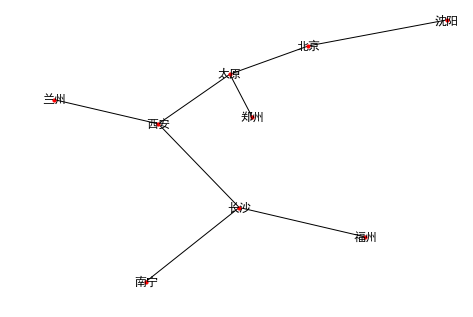

In [119]:
nx.draw(nx.Graph(simple_connection_info), city_location, with_labels=True, node_size=10)

In [140]:
def search (start ,distination, connect_graph ,sort_candidate):
        paths = [[start]]
        visitied =set()
        
        while paths :
            path = paths.pop()
            froninter = path[-1] 
            if froninter in visitied:continue 
            for city in connect_graph[froninter]:
                if city in path : continue
                
                new_path = path + [city]
                
                paths.append(new_path)
                
                if city == distination :return new_path
            
            visitied.add(froninter)
            paths = sort_candidate(paths)
    
   
    
                
                    

In [141]:
def shortest_path_first(pathes):
    
    if len(pathes) <= 1: return pathes
    
    def get_path_distnace(path):
        distance = 0
        for station in path[:-1]:
            distance += get_geo_distance(station, path[-1])
            
        return distance

    return sorted(pathes, key=get_path_distnace)

In [142]:
search('兰州', '福州', simple_connection_info, sort_candidate=shortest_path_first)


['兰州', '西安', '长沙', '福州']

In [143]:

from sklearn.datasets import load_boston

In [146]:
data = load_boston()

In [147]:
X,y = data['data'],data['target']

In [148]:
X[1]

array([2.7310e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
       6.4210e+00, 7.8900e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
       1.7800e+01, 3.9690e+02, 9.1400e+00])

In [150]:
y[1]

21.6

In [151]:
len(X[:,1])

506

In [153]:
len(y)

506

In [154]:
%matplotlib inline

In [157]:
import matplotlib.pyplot as plt

In [168]:
def draw_rm_and_price():
    plt.scatter(X[:,5],y)

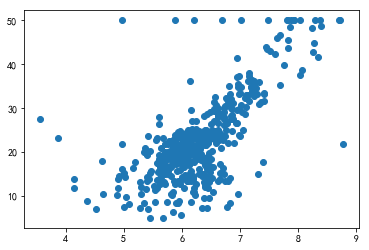

In [170]:
draw_rm_and_price()

In [171]:
import random 

In [172]:
def price(rm,k,b):
    return k*rm +b 

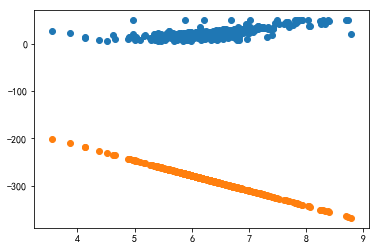

In [173]:
X_rm = X[:, 5]
k = random.randint(-100, 100)
b = random.randint(-100, 100)
price_by_random_k_and_b = [price(r, k, b) for r in X_rm]

draw_rm_and_price()
plt.scatter(X_rm, price_by_random_k_and_b)

In [174]:
def loss(y, y_hat): # to evaluate the performance 
    return sum((y_i - y_hat_i)**2 for y_i, y_hat_i in zip(list(y), list(y_hat))) / len(list(y))

In [178]:
X_rm = X[:, 5]
trytime = 2000
min_loss = float('inf')
for i in range (trytime):
    k = random.randint(-100, 100)
    b = random.randint(-100, 100)
    price_by_random_k_and_b = [price(r, k, b) for r in X_rm]
    
    current_loss = loss(y,price_by_random_k_and_b)
    
    if current_loss < min_loss:
        best_b ,best_k = b ,k
        min_loss = current_loss
        print('When time is : {}, get best_k: {} best_b: {}, and the loss is: {}'.format(i, best_k, best_b, min_loss))
    
        
    

When time is : 0, get best_k: 83 best_b: -70, and the loss is: 186853.9728892944
When time is : 1, get best_k: 53 best_b: 100, and the loss is: 169546.65136407682
When time is : 2, get best_k: 12 best_b: -26, and the loss is: 770.4233698972326
When time is : 27, get best_k: 12 best_b: -33, and the loss is: 443.0640813596839
When time is : 97, get best_k: 12 best_b: -42, and the loss is: 166.17356752569165
When time is : 103, get best_k: 20 best_b: -97, and the loss is: 140.05915968379452
When time is : 114, get best_k: 19 best_b: -100, and the loss is: 101.63311930237155
When time is : 141, get best_k: 11 best_b: -48, and the loss is: 47.34035708893284
When time is : 1199, get best_k: 8 best_b: -29, and the loss is: 45.77586207114628


In [181]:
X_rm = X[:, 5]
trytime = 2000
min_loss = float('inf')
direction = [
    (+1,+1),
    (+1,-1),
    (-1,-1),
    (-1,+1)
]
            
next_direction = random.choice(direction)
best_k = random.randint(-100, 100)
best_b = random.randint(-100, 100)
scalar = 0.1
for i in range (trytime):
    current_k, current_b = best_k + next_direction[0] * scalar, best_b + next_direction[1] * scalar
    price_by_random_k_and_b = [price(r, current_k, current_b) for r in X_rm]
    
    current_loss = loss(y,price_by_random_k_and_b)
    
    if current_loss < min_loss:
        best_k ,best_b = current_k,current_b
        min_loss = current_loss
        next_direction = next_direction
        print('When time is : {}, get best_k: {} best_b: {}, and the loss is: {}'.format(i, best_k, best_b, min_loss))
    else :
        next_direction = random.choice(direction)
    
        

When time is : 0, get best_k: 38.1 best_b: 69.1, and the loss is: 82260.62601523258
When time is : 2, get best_k: 38.0 best_b: 69.0, and the loss is: 81841.60595072723
When time is : 3, get best_k: 37.9 best_b: 68.9, and the loss is: 81423.65705808942
When time is : 4, get best_k: 37.8 best_b: 68.80000000000001, and the loss is: 81006.77933731902
When time is : 5, get best_k: 37.699999999999996 best_b: 68.70000000000002, and the loss is: 80590.97278841618
When time is : 6, get best_k: 37.599999999999994 best_b: 68.60000000000002, and the loss is: 80176.23741138101
When time is : 7, get best_k: 37.49999999999999 best_b: 68.50000000000003, and the loss is: 79762.57320621288
When time is : 8, get best_k: 37.39999999999999 best_b: 68.40000000000003, and the loss is: 79349.98017291247
When time is : 9, get best_k: 37.29999999999999 best_b: 68.30000000000004, and the loss is: 78938.45831147944
When time is : 10, get best_k: 37.19999999999999 best_b: 68.20000000000005, and the loss is: 78528.